In [1]:
import pandas as pd 
import numpy as np
import yfinance
from IPython.display import HTML
import random
#from ipynb.fs.full.Functions1 import hide_toggle
#from operator import itemgetter 
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
%matplotlib inline
#from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import pandas_datareader as pdr
import datetime as dt
import talib
from itertools import compress
import plotly.express as px
import plotly.graph_objects as go

#from ipynb.fs.full.Hide import hide_toggle

In [13]:
symbol ="AAPL"
num_name= symbol.split(' ') 
df = []
for i in num_name:
        ticker = yfinance.Ticker(i)
        data=ticker.history(interval='60m',period="3mo")
        data['Date'] = pd.to_datetime(data.index) # just to crate another column for date!!!
        data['Date'] = data['Date'].apply(mpl_dates.date2num)
        data = data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
        ohlc_data= data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']].values
        df.append(data)

df[0]

,Date,Open,High,Low,Close
Datetime,,,,,
2020-11-13 09:30:00-05:00,18579.604167,119.440002,119.671700,117.930000,118.680000
2020-11-13 10:30:00-05:00,18579.645833,118.690002,118.690002,117.870003,118.250000
2020-11-13 11:30:00-05:00,18579.687500,118.250000,118.989998,118.000000,118.779999
2020-11-13 12:30:00-05:00,18579.729167,118.775002,119.254997,118.625000,119.035004
2020-11-13 13:30:00-05:00,18579.770833,119.034203,119.070000,118.199997,118.510002
...,...,...,...,...,...
2021-02-12 11:30:00-05:00,18670.687500,134.524994,134.679993,134.160004,134.169907
2021-02-12 12:30:00-05:00,18670.729167,134.169006,134.384995,134.000000,134.179993
2021-02-12 13:30:00-05:00,18670.770833,134.190002,134.380005,134.080002,134.279999


In [14]:
# create 20 days simple moving average column
data['20_SMA'] = data['Close'].rolling(window = 20, min_periods = 1).mean()
# create 50 days simple moving average column
data['50_SMA'] = data['Close'].rolling(window = 50, min_periods = 1).mean()
# display first few rows
data.head()


,Date,Open,High,Low,Close,20_SMA,50_SMA
Datetime,,,,,,,
2020-11-13 09:30:00-05:00,18579.604167,119.440002,119.671700,117.930000,118.680000,118.680000,118.680000
2020-11-13 10:30:00-05:00,18579.645833,118.690002,118.690002,117.870003,118.250000,118.465000,118.465000
2020-11-13 11:30:00-05:00,18579.687500,118.250000,118.989998,118.000000,118.779999,118.570000,118.570000
2020-11-13 12:30:00-05:00,18579.729167,118.775002,119.254997,118.625000,119.035004,118.686251,118.686251
2020-11-13 13:30:00-05:00,18579.770833,119.034203,119.070000,118.199997,118.510002,118.651001,118.651001


In [15]:
data['Signal'] = 0.0
data['Signal'] = np.where(data['20_SMA'] > data['50_SMA'], 1.0, 0.0)
data

,Date,Open,High,Low,Close,20_SMA,50_SMA,Signal
Datetime,,,,,,,,
2020-11-13 09:30:00-05:00,18579.604167,119.440002,119.671700,117.930000,118.680000,118.680000,118.680000,0.0
2020-11-13 10:30:00-05:00,18579.645833,118.690002,118.690002,117.870003,118.250000,118.465000,118.465000,0.0
2020-11-13 11:30:00-05:00,18579.687500,118.250000,118.989998,118.000000,118.779999,118.570000,118.570000,0.0
2020-11-13 12:30:00-05:00,18579.729167,118.775002,119.254997,118.625000,119.035004,118.686251,118.686251,0.0
2020-11-13 13:30:00-05:00,18579.770833,119.034203,119.070000,118.199997,118.510002,118.651001,118.651001,0.0
...,...,...,...,...,...,...,...,...
2021-02-12 11:30:00-05:00,18670.687500,134.524994,134.679993,134.160004,134.169907,135.075475,135.691094,0.0
2021-02-12 12:30:00-05:00,18670.729167,134.169006,134.384995,134.000000,134.179993,134.952935,135.678794,0.0
2021-02-12 13:30:00-05:00,18670.770833,134.190002,134.380005,134.080002,134.279999,134.846455,135.664694,0.0


In [16]:
data['Position'] = data['Signal'].diff()
# display first few rows
data.head()

,Date,Open,High,Low,Close,20_SMA,50_SMA,Signal,Position
Datetime,,,,,,,,,
2020-11-13 09:30:00-05:00,18579.604167,119.440002,119.671700,117.930000,118.680000,118.680000,118.680000,0.0,NaN
2020-11-13 10:30:00-05:00,18579.645833,118.690002,118.690002,117.870003,118.250000,118.465000,118.465000,0.0,0.0
2020-11-13 11:30:00-05:00,18579.687500,118.250000,118.989998,118.000000,118.779999,118.570000,118.570000,0.0,0.0
2020-11-13 12:30:00-05:00,18579.729167,118.775002,119.254997,118.625000,119.035004,118.686251,118.686251,0.0,0.0
2020-11-13 13:30:00-05:00,18579.770833,119.034203,119.070000,118.199997,118.510002,118.651001,118.651001,0.0,0.0


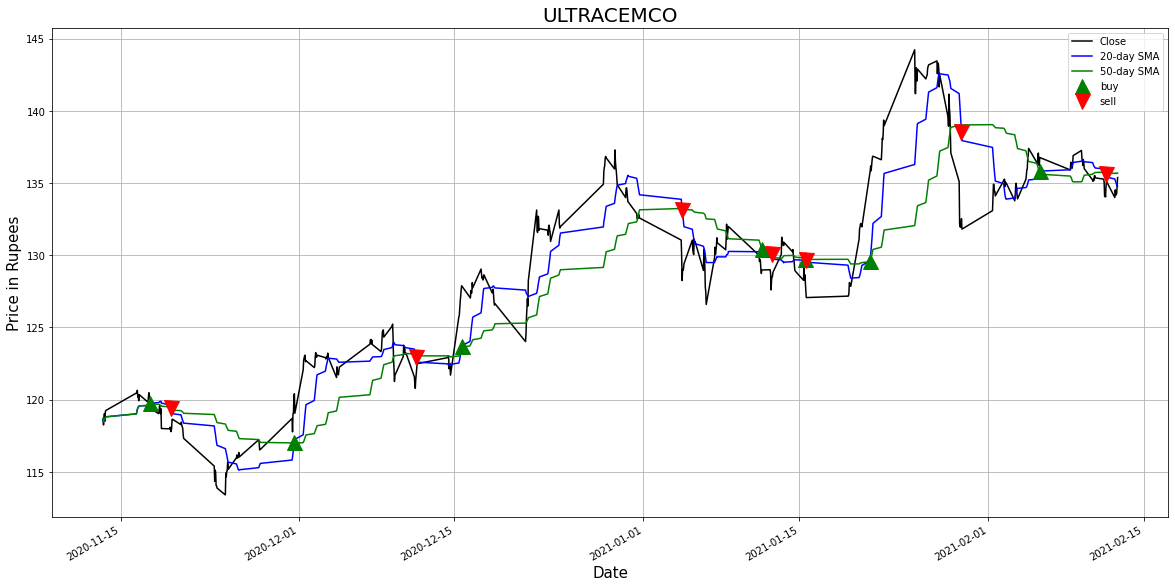

In [17]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
data['Close'].plot(color = 'k', label= 'Close') 
data['20_SMA'].plot(color = 'b',label = '20-day SMA') 
data['50_SMA'].plot(color = 'g', label = '50-day SMA')
# plot ‘buy’ signals
plt.plot(data[data['Position'] == 1].index, 
         data['20_SMA'][data['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(data[data['Position'] == -1].index, 
         data['20_SMA'][data['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('ULTRACEMCO', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [18]:
fig = go.Figure()

#Candlestick
stock_name= num_name[0]
fig.add_trace(go.Candlestick(x=data.index,
                open=df[0]['Open'],
                high=df[0]['High'],
                low=df[0]['Low'],
                close=df[0]['Close'], name = f'{stock_name} '))

# data['20_SMA'].plot(color = 'b',label = '20-day SMA') 
# data['50_SMA'].plot(color = 'g', label = '50-day SMA')

# fig = px.line(x=fruits, y=[1,3,2], color=px.Constant("This year"),
#              labels=dict(x="Fruit", y="Amount", color="Time Period"))

fig.add_trace(go.Scatter(
        x=data.index,
        y=df[0]['20_SMA'],name="20SMA"
    ))
fig.add_trace(go.Scatter(
        x=data.index,
        y=df[0]['50_SMA'],name="50SMA"
    ))
# fig.add_bar(x=fruits, y=[2,1,3], name="Last year")

# Add titles
fig.update_layout(
    title=f'{stock_name} live share price evolution',
    yaxis_title='Stock Price (USD per Shares)')

# X-Axes
fig.update_xaxes(
    rangeslider_visible=True,
    rangebreaks=[
            # NOTE: Below values are bound (not single values), ie. hide x to y
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
            # dict(values=["2019-12-25", "2020-12-24"])  # hide holidays (Christmas and New Year's, etc)
        ],
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1d", step="day", stepmode="backward"),
            dict(count=5, label="5d", step="day", stepmode="backward"),
            dict(count=1, label="DTD", step="day", stepmode="todate"),
            dict(count=15, label="15", step="day", stepmode="backward"),
            dict(step="all")
        ])
    )
)

#Show
fig.show()

In [26]:
fig = go.Figure()

#Candlestick
stock_name= num_name[0]
fig.add_trace(go.Candlestick(x=data.index,
                open=df[0]['Open'],
                high=df[0]['High'],
                low=df[0]['Low'],
                close=df[0]['Close'], name = f'{stock_name} '))

fig.add_trace(go.Scatter(
        x=data.index,
        y=df[0]['50_SMA'],name="50SMA"
    ))

fig.add_trace(go.Scatter(
        x=data.index,
        y=df[0]['20_SMA'],name="20SMA"
    ))

# fig.add_trace(go.Scatter(
#         x=data[data['Position'] == 1].index,
#         y=data['20_SMA'][data['Position'] == 1]
                         
#     ))

# # # plot ‘buy’ signals
# fig.plot(data[data['Position'] == 1].index, 
#          data['20_SMA'][data['Position'] == 1], 
#          '^', markersize = 15, color = 'g', label = 'buy')
# # plot ‘sell’ signals
# fig.plot(data[data['Position'] == -1].index, 
#          data['20_SMA'][data['Position'] == -1], 
#          'v', markersize = 15, color = 'r', label = 'sell')

# df = px.data.iris()
# fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")

# fig.update_traces(marker=dict(size=12,
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
#                   selector=dict(mode='markers'))

# fig.add_bar(x=fruits, y=[2,1,3], name="Last year")

# Add titles
fig.update_layout(
    title=f'{stock_name} live share price evolution',
    yaxis_title='Stock Price (USD per Shares)')

# X-Axes
fig.update_xaxes(
        rangeslider_visible=False,

    rangebreaks=[
            # NOTE: Below values are bound (not single values), ie. hide x to y
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
            # dict(values=["2019-12-25", "2020-12-24"])  # hide holidays (Christmas and New Year's, etc)
    ],
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1d", step="day", stepmode="backward"),
            dict(count=5, label="5d", step="day", stepmode="backward"),
            dict(count=1, label="DTD", step="day", stepmode="todate"),
            dict(count=15, label="15", step="day", stepmode="backward"),
            dict(step="all"),
            
        ])
    ))


         
    
    


#Show
fig.show()

In [5]:
fig = go.Figure()

#Candlestick
stock_name= num_name[0]
fig.add_trace(go.Candlestick(x=data.index,
                open=df[0]['Open'],
                high=df[0]['High'],
                low=df[0]['Low'],
                close=df[0]['Close'], name = f'{stock_name} '))
# fig.add_trace(go.Scatter(
#         x=data.index,
#         y=df[0]['Close'],name=f"{stock_name}"
#     ))
fig.add_trace(go.Scatter(
        x=data.index,
        y=df[0]['50_SMA'],name="50SMA"
    ))

fig.add_trace(go.Scatter(
        x=data.index,
        y=df[0]['20_SMA'],name="20SMA"
    ))

# fig.add_bar(x=fruits, y=[2,1,3], name="Last year")

# Add titles
fig.update_layout(
    title=f'{stock_name} live share price evolution',
    yaxis_title='Stock Price (USD per Shares)')

# X-Axes
fig.update_xaxes(
    rangeslider_visible=False,
    rangebreaks=[
            # NOTE: Below values are bound (not single values), ie. hide x to y
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
            # dict(values=["2019-12-25", "2020-12-24"])  # hide holidays (Christmas and New Year's, etc)
    ],
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1d", step="day", stepmode="backward"),
            dict(count=5, label="5d", step="day", stepmode="backward"),
            dict(count=1, label="DTD", step="day", stepmode="todate"),
            dict(count=15, label="15", step="day", stepmode="backward"),
            dict(step="all")
        ])
    ))


         
    
    


#Show
fig.show()